# 1. Integración de LLMs en LangChain

En esta sección conocerás sobre los diferentes tipos de modelos que proporciona LangChain, sus ventajas y cómo utilizarlos para crear aplicaciones de IA potentes usando LLM.

**¿Qué es un modelo?**

Un modelo en LangChain es un modelo de aprendizaje automático pre-entrenado que se puede utilizar para realizar una tarea específica como generar texto, traducir idiomas o responder preguntas. Con LangChain puedes usar una variedad de modelos y utilizarlos para crear aplicaciones de IA sin tener que entrenar tus propios modelos desde cero.

**Ventajas de usar modelos de LangChain**

Hay varias ventajas de usar modelos de LangChain:

* **Consistencia:** Los modelos de LangChain proporcionan una interfaz consistente, independientemente de si está utilizando OpenAI o Hugging Face. Esto hace que sea más fácil aprender y usar los modelos de LangChain, y cambiar entre diferentes modelos si es necesario.
* **Eficiencia:** Los modelos de LangChain están pre-entrenados y alojados en la nube, lo que los hace mucho más rápidos de usar que entrenar sus propios modelos.
* **Flexibilidad:** Los modelos de LangChain se pueden utilizar para una variedad de tareas, como la comprensión del lenguaje natural, la traducción automática y el análisis de sentimientos.

**Ejemplos prácticos de uso de modelos de LangChain**

* **Generación de texto:** Utiliza un LLM para generar texto, como poemas, código, guiones, piezas musicales, correo electrónico, cartas, etc.
* **Traducción de idiomas:** Trauce un texto de un idioma a otro con modelos de lenguaje.
* **Escritura de diferentes tipos de contenido creativo:** Usa un modelo de lenguaje para escribir diferentes tipos de contenido creativo, como poemas, código, guiones, piezas musicales, correo electrónico, cartas, etc.
* **Respuesta a sus preguntas de forma informativa:** Utiliza un modelo de preguntas y respuestas para responder con información del modelo o que pueda consultar en otras fuentes, incluso si son abiertas, desafiantes o extrañas.


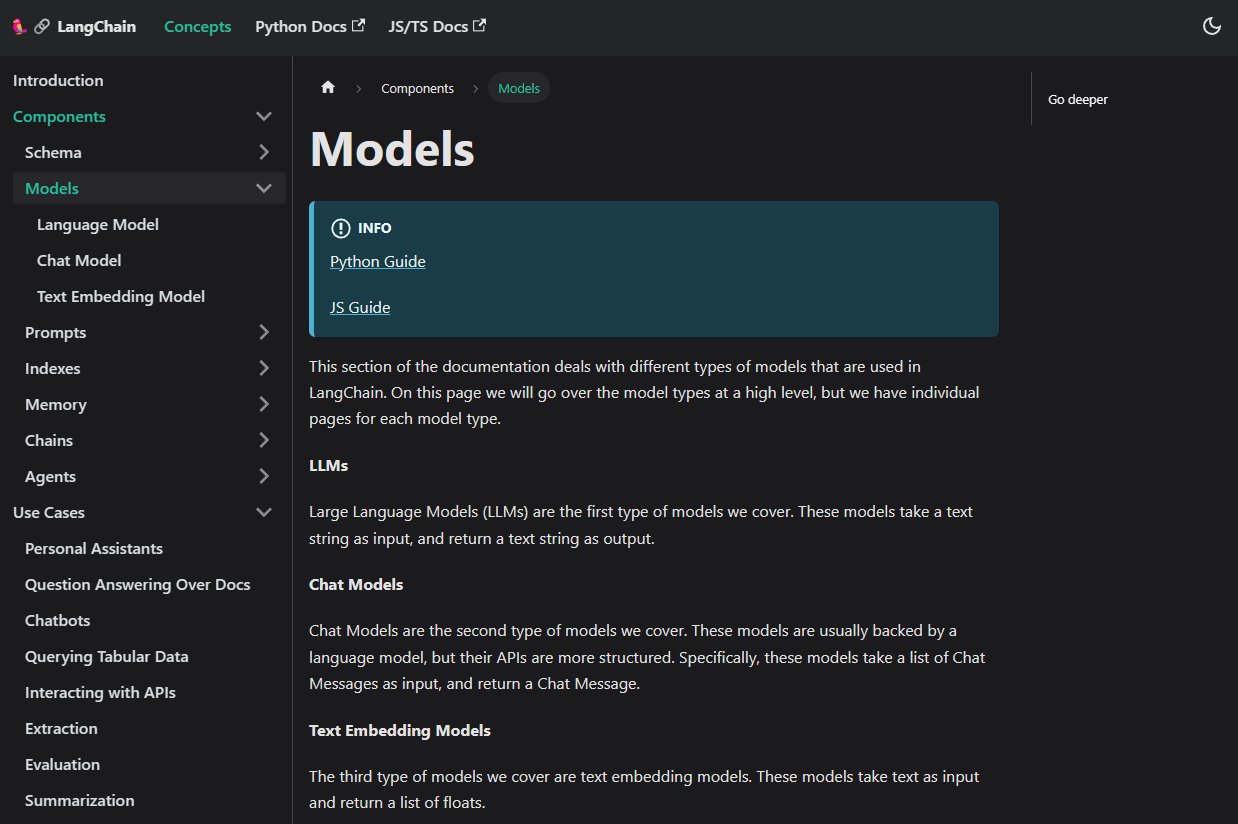

LangChain tiene integraciones con varios modelos o plataformas de modelos, como el Hugging Face Hub. Con el tiempo, habrá disponibles más integraciones y modelos.

LangChain Models Docs: https://docs.langchain.com/docs/components/models/

## 1.1 Uso de modelos Open Source de Hugging Face

In [1]:
# %%capture
# !pip install langchain

Los modelos de Hugging Face requieren instalación de `einops`. Para utilizar `low_cpu_mem_usage=True` o `device_map` es necesario contar con `Accelerate` instalado: `pip install accelerate`.

In [ ]:
# %%capture
# !pip install -q transformers einops accelerate

Se debe tener en cuenta que entre más grande el `max_length`, es decir la cantidad de texto que podemos incluir en una consulta a nuestro modelo, más recursos computacionales se requieren.

In [2]:
from langchain_huggingface import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch

model_id = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(model_id,
                                            torch_dtype=torch.float16,
                                            trust_remote_code=True,
                                            device_map="auto")


pipe = pipeline("text-generation",
                model=model,
                tokenizer=tokenizer,
                max_new_tokens=200,
                temperature=0.5,
                do_sample=True,
                top_k=10,
                num_return_sequences=1,
                eos_token_id=tokenizer.eos_token_id,
                return_full_text=False)

hf = HuggingFacePipeline(pipeline=pipe)

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.




modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

Device set to use mps


Podemos enviar preguntas directamente al pipeline de Hugging Face para generar texto con nuestro modelo. Sin embargo, LangChain nos facilita la vida.

In [3]:
hf

HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x349fe9f50>, model_id='tiiuae/falcon-7b-instruct')

In [5]:
response = hf.invoke("What is the capital of Panama?")
print(response)

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.



Panama City


Los modelos de código abierto de Hugging Face son increíblemente poderosos. Sin embargo, al utilizarlos de esta manera, los descargamos y ejecutamos en nuestra propia máquina. Ahí es donde existen algunas complicaciones, ya que esto puede ser lento a menos que se cuente con el hardware adecuado.

Ahora piensa en modelos que provienen de API y servicios de OpenAI, Cohere y otros proveedores de modelos remotos (que normalmente no son de código abierto). La magia de estos modelos es que funcionan en sus servidores, no en nuestra máquina.

Es como si estuvieras invitado a una fiesta. Podrías hacer la fiesta en tu casa (como usar los modelos de Hugging Face en tu máquina), pero tendrías que hacer la limpieza antes y después, y preocuparte por la música, la comida, etc. En cambio, si la fiesta se celebra en un restaurante o salón dedicado a fiestas (como usar modelos de OpenAI o Cohere en sus servidores), solo tienes que llegar y disfrutar.

Por esto, vamos a seguir utilizando los modelos de la [API de OpenAI](https://platzi.com/cursos/openai). Todo lo que vamos a hacer a partir de ahora también se puede aplicar a los modelos descargados de Hugging Face.

## 1.2 Uso de modelos de OpenAI API

La clase `langchain.llms.OpenAI` nos permite inicializar un modelo de proveedor OpenAI.

In [6]:
# %%capture
# !pip install openai

Es necesario configurar la API Key de tu cuenta de OpenAI.

In [5]:
from utils.config import foundation_models


In [7]:
OPENAI_API_KEY = foundation_models['openai']
type(OPENAI_API_KEY)

str

Para usar al máximo los LLM con LangChain, tenemos que ajustar unas cuantas configuraciones básicas:

1. `model_name` - ¿Qué modelo vamos a usar?
    Por ejemplo, "text-davinci-003" (que es el valor por defecto) o "text-ada-001". Estos nombres cambian según quién haya creado el modelo, así que necesitas revisar la documentación de la API del proveedor que estás utilizando para encontrar el nombre específico de tu modelo.

2. `n` - La cantidad de respuestas distintas que vamos a generar para la pregunta dada (el número estándar es 1)

3. `streaming` - ¿Queremos que los resultados se transmitan poco a poco? (por defecto es "Falso").
    Esto es como decidir si preferimos escuchar una canción entera de una vez, o escucharla nota por nota. Esto es especialmente útil cuando estás armando una experiencia de chatbot y quieres que el texto aparezca línea por línea, en lugar de un solo bloque de respuesta.

4. `temperature` - Aquí ajustamos la "temperatura de muestreo" en un rango de 0 a 1.
    Imagina que la temperatura es como ajustar el nivel de improvisación de un solo de guitarra. Si la temperatura es 0, el LLM solo es "preciso" y siempre tocará las notas más probables. Siempre va a sonar igual para la misma canción. Pero si la temperatura es 1, el solo será "creativo" y va a tocar notas diferentes cada vez que lo escuches, a veces incluso notas que te sorprenden. El valor estándar es 0.7, lo que se considera lo suficientemente creativo pero no completamente aleatorio, como un solo de guitarra que sale un poco de los rieles, pero no tanto como para descarrilar la canción.


In [8]:
from langchain_openai import ChatOpenAI

In [9]:
model = 'gpt-4o-mini'

In [10]:
llm = ChatOpenAI(
    api_key=OPENAI_API_KEY,
    model=model,
    temperature=0.3,
    max_tokens=None,
    timeout=None,
    max_retries=2
)

Una vez que el modelo LLM está configurado, podemos interactuar con él de la misma manera que lo haríamos con ChatGPT.

In [14]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to Spanish. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
print(ai_msg)
ai_msg.content

content='Me encanta programar.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 6, 'prompt_tokens': 31, 'total_tokens': 37, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BW2IG7v13E2wUXIjVsmBIq3b518Wx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--da2f2bcf-c548-4d08-99d1-579a418cf5fd-0' usage_metadata={'input_tokens': 31, 'output_tokens': 6, 'total_tokens': 37, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


'Me encanta programar.'

In [21]:
import tiktoken

In [ ]:
# count the number of tokens in a string with tiktoken from OpenAI
# This is the same encoding used by OpenAI models

def num_tokens_from_string(text: str) -> int:
    """Returns the number of tokens in a text string."""
    model = 'gpt-4o-mini'
    encoding = tiktoken.encoding_for_model(model)
    num_tokens = len(encoding.encode(text))
    return num_tokens

text = "I love programming."
num_tokens_from_string(text)

4

Otra función útil proporcionada por la clase LLM es `get_num_tokens`, que estima el número de tokens y fragmentos de texto contenidos en una entrada. Esta información es valiosa cuando se necesita limitar el número total de tokens o cumplir con un presupuesto específico.

In [19]:
# %%capture
# !pip install tiktoken

In [22]:
# get the number of tokens in a string with langchain

llm.get_num_tokens(text)

4

## 1.3 Prompt templates

Un 'prompt' o 'indicación' es como una receta que le proporcionamos a nuestro modelo de inteligencia artificial (IA). Esta receta contiene los ingredientes y las instrucciones que la IA necesita para cocinar la respuesta que estamos buscando.

1. **Instrucciones:** Esta es la parte donde le decimos a nuestro modelo de IA exactamente qué queremos que haga. Piensa en esto como cuando lees una receta de cocina. Por ejemplo, "corta las verduras", "sofríe los ingredientes", etc.

2. **Información externa o contexto:** Este es el ingrediente que añadimos a nuestra receta. Podría ser información que obtenemos de una base de datos, un cálculo que hemos hecho, etc. Esto le da a nuestro modelo un poco de sabor adicional y contexto sobre lo que estamos buscando.

3. **Entrada del usuario o consulta:** Este es el ingrediente principal de nuestra receta. Es el dato que el usuario introduce y en torno al cual queremos que nuestro modelo cocine la respuesta.

4. **Indicador de salida:** Piensa en esto como el momento en el que sabes que tu receta está lista. Para un modelo que genera código Python, podría ser la palabra 'import', que suele ser el comienzo de muchos scripts de Python. Para un chatbot, podría ser la frase 'Chatbot:', indicando que es hora de que el chatbot hable.

Por lo general, estos componentes se colocan en el orden en que los hemos descrito, igual que seguirías los pasos de una receta de cocina. Empezamos con las instrucciones, añadimos el contexto, luego la entrada del usuario, y finalmente, buscamos nuestro indicador de salida para saber que hemos terminado.

Agregamos estas cuatro recetas en el siguiente prompt que habla con estilo argentino.

Puedes aprender más de prompt engineering en https://platzi.com/cursos/chatgpt/


In [23]:
prompt_argentino = """Respondé la pregunta basándote en el contexto de abajo. Si la
pregunta no puede ser respondida usando la información proporcionada,
respondé con "Ni idea, che".

Contexto: Los Modelos de Lenguaje de Gran Escala (MLGEs) son lo último en modelos usados en el Procesamiento del Lenguaje Natural (NLP).
Su desempeño superior a los modelos más chicos los hizo increíblemente
útiles para los desarrolladores que arman aplicaciones con NLP. Estos modelos
se pueden acceder vía la librería `transformers` de Hugging Face, vía OpenAI
usando la librería `openai`, y vía Cohere usando la librería `cohere`.

Pregunta: ¿Qué librerías y proveedores de modelos ofrecen MLGEs?

Respuesta (escribe como argentina informal): """

print( llm.invoke(prompt_argentino) )

content='Los MLGEs los podés conseguir con la librería `transformers` de Hugging Face, con la librería `openai` de OpenAI, y también con la librería `cohere` de Cohere. ¡Así que tenés varias opciones!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 175, 'total_tokens': 231, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_dbaca60df0', 'id': 'chatcmpl-BW4GxrboGCdNhHixd6z3rd8ILfTqD', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--6e0ae1e9-6655-4eb6-8a17-160672bc2f10-0' usage_metadata={'input_tokens': 175, 'output_tokens': 56, 'total_tokens': 231, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


Normalmente, no tenemos ni idea de lo que los usuarios van a preguntar de antemano. Así que, en lugar de escribir la pregunta directamente en el código, creamos un `PromptTemplate` (una plantilla de indicación) que tiene una casilla reservada para la pregunta. Es como tener una receta de cocina, pero en lugar de especificar 'pollo', tenemos un espacio en blanco que dice 'ingrediente principal'. De esta manera, los usuarios pueden poner lo que quieran en ese espacio, y el sistema adaptará su respuesta de acuerdo con lo que ellos introduzcan.


In [ ]:
from langchain import PromptTemplate

plantilla_colombiana = """Responde a la pregunta con base en el siguiente contexto, parce. Si la
pregunta no puede ser respondida con la información proporcionada, responde
con "No tengo ni idea, ome".

Contexto: Los Modelos de Lenguaje Grandes (LLMs) son los últimos modelos utilizados en PNL.
Su rendimiento superior sobre los modelos más pequeños los ha hecho increíblemente
útiles para los desarrolladores que construyen aplicaciones habilitadas para PNL. Estos modelos
pueden ser accedidos a través de la biblioteca `transformers` de Hugging Face, a través de OpenAI
usando la biblioteca `openai`, y a través de Cohere usando la biblioteca `cohere`.

Pregunta: {query}

Respuesta (escribe como colombiano informal): """



Crearemos una cadena, más adelante conocerás exactamente qué significa esto. Por ahora, lo relevante es que nos permite unir nuestro prompt con un modelo.

In [34]:
from langchain_core.prompts import PromptTemplate


prompt_template = PromptTemplate.from_template("""Responde a la pregunta con base en el siguiente contexto, parce. Si la
pregunta no puede ser respondida con la información proporcionada, responde
con "No tengo ni idea, ome".

Contexto: {context}
Pregunta: {question}

Respuesta (escribe como colombiano informal): """)


chain = prompt_template | llm

response = chain.invoke({
    "context": "Los gatos son animales domésticos muy populares.",
    "question": "¿Qué son los gatos?"
})

print(response)




content='Los gatos son unos bichos bien chéveres que la gente tiene en la casa, parce. Son animales domésticos y son súper populares.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 77, 'total_tokens': 107, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BW6wpq3VEMIPBAGAWtbSttxYFgxi8', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--d723c3c9-1965-4ef6-a5f2-04278338e85d-0' usage_metadata={'input_tokens': 77, 'output_tokens': 30, 'total_tokens': 107, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [35]:
response = chain.invoke({
    "context": "Los gatos son animales domésticos muy populares.",
    "question": "¿Qué son los LLM?"
})

print(response)

content='No tengo ni idea, ome.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 78, 'total_tokens': 86, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0392822090', 'id': 'chatcmpl-BW6yFQS5pYR6ZemP6WBpmxxMYhJfx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--03cf6991-5c75-4567-8c79-cdc0469d00fe-0' usage_metadata={'input_tokens': 78, 'output_tokens': 8, 'total_tokens': 86, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [38]:
type(chain)

langchain_core.runnables.base.RunnableSequence

In [42]:
chain


PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Responde a la pregunta con base en el siguiente contexto, parce. Si la\npregunta no puede ser respondida con la información proporcionada, responde\ncon "No tengo ni idea, ome".\n\nContexto: {context}\nPregunta: {question}\n\nRespuesta (escribe como colombiano informal): ')
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x125481750>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x123f29e50>, root_client=<openai.OpenAI object at 0x123f2afd0>, root_async_client=<openai.AsyncOpenAI object at 0x125558ad0>, model_name='gpt-4o-mini', temperature=0.3, model_kwargs={}, openai_api_key=SecretStr('**********'), max_retries=2)

## 1.4 Chains (Cadenas)

Una cadena está compuesta por diferentes elementos, denominados eslabones, que pueden ser primitivas o incluso otras cadenas. Las primitivas, a su vez, pueden ser prompts, LLMs, utilidades, u otras cadenas.

Así que, en términos sencillos, una cadena no es más que una secuencia de operaciones que se llevan a cabo utilizando una mezcla específica de primitivas para procesar una entrada dada. Si lo visualizas de manera intuitiva, podrías pensar en una cadena como una especie de 'paso', que realiza un conjunto específico de operaciones en una entrada y produce un resultado. Estas operaciones pueden variar desde un prompt que pasa a través de un LLM, hasta la ejecución de una función de Python sobre un texto.

Las cadenas se agrupan en tres categorías principales:
- Cadenas de utilidad (Utility chain).
- Cadenas fundacionales (Foundational chains).
- Cadenas de combinación de documentos.

En este segmento, nos concentraremos en las primeras dos categorías, ya que la tercera es muy específica.

* Cadenas de utilidad (Utility chains): Este tipo de cadenas generalmente se emplean para extraer una respuesta específica de un LLM con un objetivo muy definido, y están listas para ser usadas sin modificaciones.

* Cadenas fundacionales (Foundational chains): Estas cadenas se usan como base para construir otras cadenas, sin embargo, a diferencia de las Cadenas de utilidad, las Cadenas fundacionales no pueden ser usadas tal cual sin formar parte de una cadena más compleja.


### 1.4.1 Utility Chains

Importamos un texto para que trabajemos con él. En el módulo de índices aprenderemos más sobre lo que está ocurriendo.

In [43]:
# %%capture
# !pip install pypdf chromadb

In [ ]:
import requests
from utils.paths import DATA_EXTERNAL_DIR, DB_DIR
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter


# Descargar PDF
url = 'https://www.cs.virginia.edu/~evans/greatworks/diffie.pdf'
response = requests.get(url)
pdf_name = "public_key_cryptography.pdf"
pdf_path = str(DATA_EXTERNAL_DIR / pdf_name)

with open(pdf_path, 'wb') as f:
    f.write(response.content)

# Cargar PDF
loader = PyPDFLoader(pdf_path)
data = loader.load()

# Dividir en chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = text_splitter.split_documents(data)

chroma_db_path = str(DB_DIR / "chroma_db")

# Embeddings y persistencia con Chroma
embeddings = OpenAIEmbeddings()
vectorstore = Chroma.from_documents(
    documents=chunks,
    embedding=embeddings,
    persist_directory=chroma_db_path
)
vectorstore.persist()

/var/folders/2c/4m1kjtq111185gtk88rhh1dm0000gn/T/ipykernel_22184/539895445.py:37: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


Imagina que tienes un libro de 18 páginas delante de ti y alguien te pide un resumen. ¿Cómo lo haces? Seguramente no intentarías leer las 18 páginas de una sola vez y luego producir un resumen, ¿verdad? En su lugar, es probable que leyeras una página a la vez, escribieras un pequeño resumen, y luego lo harías para las siguientes páginas. Después de resumir todas las páginas de manera individual, podrías combinar esos resúmenes en uno más general.

¡Exactamente eso es lo que hace **`load_summarize_chain`**!

Esta cadena divide el texto en secciones más manejables (por ejemplo, por página) y luego llama al modelo de lenguaje para generar un resumen de cada sección. Una vez que todos los resúmenes individuales se han generado, los combina en un solo resumen. De esta manera, incluso un texto muy largo se puede resumir de manera efectiva.

Por tanto, si estás trabajando con un documento de investigación de 18 páginas, puedes dividirlo en 18 documentos separados, uno por página, y luego usar **`load_summarize_chain`** para generar un resumen general. ¿No es fantástico?

In [46]:
len(data)

18

In [47]:
from langchain_core.runnables import RunnableLambda

summary_prompt = PromptTemplate.from_template(
    "Resume el siguiente texto de forma clara, corta y precisa:\n\n{text}"
)

summarize_chain = summary_prompt | llm

summaries = []
for chunk in chunks:
    response = summarize_chain.invoke({"text": chunk.page_content})
    summaries.append(response.content)

final_summary = "\n".join(summaries)

print("Resumen del documento:")
print(final_summary)

Resumen del documento:
El texto describe cómo los sistemas de criptografía de clave pública permiten separar las funciones de cifrado y descifrado. Esto facilita que múltiples personas cifren mensajes que solo una persona puede leer, o que una persona cifre mensajes que muchos pueden leer. Esta separación mejora la gestión de claves criptográficas y permite la firma de mensajes digitales.
La criptografía de clave pública fue descubierta en la primavera de 1975 y ha evolucionado de manera sorprendente. Aunque se propusieron diversos sistemas al principio, los que son prácticos y seguros hoy en día están estrechamente relacionados. A pesar de depender de una base matemática limitada, la criptografía de clave pública está revolucionando la seguridad en las comunicaciones al permitir la comunicación segura.
Las redes de comunicación con cientos de miles de suscriptores han sido influenciadas por la criptografía de clave pública, que ha proporcionado a los criptógrafos un enfoque sistemátic

*Nota: hablaremos en un texto sobre los chain types.

Si usamos una `chain_type` stuff entonces podemos incluir nuestro propio prompt/plantilla. Sin embargo, le cabe solo el máximo de tokens permitidos por el modelo y no documentos largos.

También podemos resolver preguntas con `RetrievalQA`

### 1.4.2 Foundational Chains

Primero, vamos a construir una función personalizada para limpiar nuestros textos de URLs y emojis. Luego, utilizaremos esta función para crear una cadena en la que introduciremos nuestro texto y esperamos obtener un texto limpio como salida.

Debemos tener en cuenta que la función que hemos creado recibe como entrada un diccionario. En este diccionario, vamos a indicar los elementos que serán procesados por la cadena que estamos creando. El resultado que obtendremos de la cadena será el texto limpio.

Esto es el principio fundamental de las cadenas fundacionales, nos proporcionan un marco para llevar a cabo una serie de transformaciones de manera ordenada y estructurada.

In [ ]:
import re

def limpiar_texto(entradas: dict) -> dict:
    texto = entradas["texto"]

    # Eliminamos los emojis utilizando un amplio rango unicode
    # Ten en cuenta que esto podría potencialmente eliminar algunos caracteres válidos que no son en inglés
    patron_emoji = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticonos
        "\U0001F300-\U0001F5FF"  # símbolos y pictogramas
        "\U0001F680-\U0001F6FF"  # símbolos de transporte y mapas
        "\U0001F1E0-\U0001F1FF"  # banderas (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE,
    )
    texto = patron_emoji.sub(r'', texto)

    # Removemos las URLs
    patron_url = re.compile(r'https?://\S+|www\.\S+')
    texto = patron_url.sub(r'', texto)

    return {"texto_limpio": texto}

In [ ]:
from langchain.chains import TransformChain



Vamos a unir nuestra cadena que limpia texto con una cadena que use GPT-3.5.

In [ ]:
plantilla = """Parafrasea este texto:

{texto_limpio}

En el estilo de una persona informal de {estilo}.

Parafraseado: """



In [ ]:
from langchain.chains import SequentialChain



In [ ]:
texto_entrada = """
¡Monterrey es una ciudad impresionante! 🏙️
Es conocida por su impresionante paisaje de montañas ⛰️ y su vibrante cultura norteña.
¡No olvides visitar el famoso Museo de Arte Contemporáneo (MARCO)!
🖼️ Si eres fanático del fútbol, no puedes perderte un partido de los Rayados o de los Tigres. ⚽
Aquí te dejo algunos enlaces para que puedas conocer más sobre esta maravillosa ciudad:
https://visitamonterrey.com, https://museomarco.org, https://rayados.com, https://www.tigres.com.mx.
¡Monterrey te espera con los brazos abiertos! 😃🇲🇽
"""
